## SVMs - Addressing noise and variance

#### Example of creating an ensemble of SVM classifiers and averaging their probabilistic predictions. Using notions we saw in the Decision Tree workskop, we then use random forests to reduce variance versus relying on individual models

In [ ]:
import warnings

warnings.filterwarnings('ignore')

Accuracy of SVM Classifier 1: 95.00%
Accuracy of SVM Classifier 2: 83.00%
Accuracy of Ensemble (SVM1 + SVM2): 88.00%
Accuracy of Random Forest: 90.00%


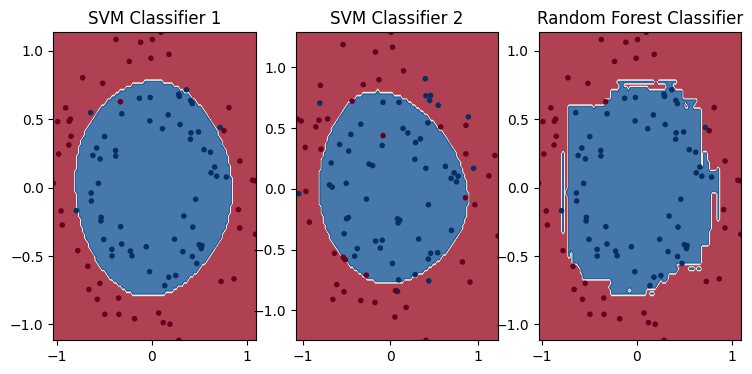

In [2]:
import numpy as np 

import matplotlib.pyplot as plt 

from sklearn.datasets import make_circles 

from sklearn.model_selection import train_test_split 

from sklearn.svm import SVC 

from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import accuracy_score 

  
# Create a synthetic dataset with intertwined circles 

X, y = make_circles(n_samples=500, noise=0.1, factor=0.62, random_state=42) 
X1, y1 = make_circles(n_samples=500, noise=0.2, factor=0.62, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

  

# Train individual SVM classifiers 

svm_classifier1 = SVC(kernel='rbf', C=1.0, probability=True) 

svm_classifier1.fit(X_train, y_train) 

  

svm_classifier2 = SVC(kernel='rbf', C=1.0, probability=True) 

svm_classifier2.fit(X_train1, y_train1) 

  

# Train a Random Forest classifier 

rf_classifier = RandomForestClassifier(n_estimators=45, random_state=42) 

rf_classifier.fit(X_train, y_train) 

  

# Make predictions using individual SVM classifiers 

svm_pred1 = svm_classifier1.predict(X_test) 

svm_pred2 = svm_classifier2.predict(X_test1) 

  

# Make predictions using the Random Forest classifier 

#rf_pred = rf_classifier.predict(X_test) 
rf_pred = rf_classifier.predict(np.mean([X_test, X_test1], axis=0))
  

# Combine predictions by averaging the SVMs 

ensemble_pred = np.mean([svm_pred1, svm_pred2], axis=0).astype(int) 

  

# Calculate accuracies 

svm1_accuracy = accuracy_score(y_test, svm_pred1) 

svm2_accuracy = accuracy_score(y_test1, svm_pred2) 

ensemble_accuracy = accuracy_score(np.mean([y_test, y_test1], axis=0), ensemble_pred) 

#rf_accuracy = accuracy_score(y_test, rf_pred) 
rf_accuracy = accuracy_score(np.mean([y_test, y_test1], axis=0), rf_pred) 


  

print("Accuracy of SVM Classifier 1: {:.2f}%".format(svm1_accuracy * 100)) 

print("Accuracy of SVM Classifier 2: {:.2f}%".format(svm2_accuracy * 100)) 

print("Accuracy of Ensemble (SVM1 + SVM2): {:.2f}%".format(ensemble_accuracy * 100))

print("Accuracy of Random Forest: {:.2f}%".format(rf_accuracy * 100)) 

 

  

# Plot decision boundaries 

def plot_decision_boundary(model, X, y): 

    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), 

                         np.linspace(X[:, 1].min(), X[:, 1].max(), 100)) 

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) 

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu) 

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, marker='.') 

  

plt.figure(figsize=(12, 4)) 

plt.subplot(141) 

plt.title("SVM Classifier 1") 

plot_decision_boundary(svm_classifier1, X_test, y_test) 

plt.subplot(142) 

plt.title("SVM Classifier 2") 

plot_decision_boundary(svm_classifier2, X_test1, y_test1) 

plt.subplot(143) 

plt.title("Random Forest Classifier") 

plot_decision_boundary(rf_classifier, X_test, y_test) 

#plt.subplot(144) 

#plt.title("Ensemble (SVM1 + SVM2)") 

#plot_decision_boundary(ensemble_pred, X_test, y_test) 

#plt.show() 